In [477]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

btc = pd.read_csv("btc_data.csv")

btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date', inplace=True)
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07
...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10


In [478]:
brent = pd.read_csv("brent_ohlcv.csv")
gold = pd.read_csv("gold_ohlcv.csv")
brent['Date'] = pd.to_datetime(brent['Date'])
brent.set_index('Date', inplace=True)

gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date', inplace=True)
print(gold.head(3))
print(brent.head(3))

                   Open         High          Low        Close  Volume
Date                                                                  
2014-12-31  1199.199951  1199.199951  1182.699951  1183.900024    92.0
2015-01-02  1184.000000  1194.500000  1169.500000  1186.000000   138.0
2015-01-05  1180.300049  1206.900024  1180.099976  1203.900024   470.0
                 Open       High        Low      Close   Volume
Date                                                           
2014-12-31  57.299999  57.770000  55.820000  57.330002   8412.0
2015-01-02  57.630001  58.220001  55.520000  56.419998  16707.0
2015-01-05  56.290001  56.290001  52.669998  53.110001  30065.0


In [479]:
brent_df = btc.join(brent, how="left", rsuffix="_brent")
brent_df


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,Volume_brent
Date,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,NaN,NaN,NaN,NaN,NaN
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,NaN,NaN,NaN,NaN,NaN
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,50542.0


Petrol ve altın fiyatlarında bulunan satırlar bazen btc tarafında bulunmuyor(ya da tam tersi)
O yüzden left join atıyorum, btc satırlarını kaybetmemek istiyorum, daha sonra forward feed ile boşlukları dolduracağım. 

In [480]:
df = brent_df.join(gold,how="left", rsuffix="_gold")
df

,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,Volume_brent,Open_gold,High_gold,Low_gold,Close_gold,Volume_gold
Date,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,50542.0,2879.199951,2936.399902,2873.800049,2931.600098,4010.0


In [481]:
n_lags = 5


cols_to_lag = ['Open', 'High', 'Low', 'Close', 'Volume']

for col in cols_to_lag:
    for lag in range(1, n_lags + 1):
        df[f'{col}_lag{lag}'] = df[col].shift(lag)

df


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,NaN,NaN,NaN,NaN,...,457.33,NaN,NaN,NaN,NaN,2.105680e+07,NaN,NaN,NaN,NaN
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,NaN,NaN,NaN,NaN,...,424.44,457.33,NaN,NaN,NaN,3.448320e+07,2.105680e+07,NaN,NaN,NaN
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,NaN,NaN,NaN,NaN,...,394.80,424.44,457.33,NaN,NaN,3.791970e+07,3.448320e+07,2.105680e+07,NaN,NaN
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,NaN,NaN,NaN,NaN,...,408.90,394.80,424.44,457.33,NaN,3.686360e+07,3.791970e+07,3.448320e+07,2.105680e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,NaN,NaN,NaN,NaN,...,97580.35,97508.97,96623.87,97885.86,95747.43,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10,3.748878e+10
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,NaN,NaN,NaN,NaN,...,96175.03,97580.35,97508.97,96623.87,97885.86,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,...,95773.38,96175.03,97580.35,97508.97,96623.87,2.733655e+10,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10


geçmişi göz önünde bulundurabilmek için lag ekliyorum

In [482]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open_brent',
       'High_brent', 'Low_brent', 'Close_brent', 'Volume_brent', 'Open_gold',
       'High_gold', 'Low_gold', 'Close_gold', 'Volume_gold', 'Open_lag1',
       'Open_lag2', 'Open_lag3', 'Open_lag4', 'Open_lag5', 'High_lag1',
       'High_lag2', 'High_lag3', 'High_lag4', 'High_lag5', 'Low_lag1',
       'Low_lag2', 'Low_lag3', 'Low_lag4', 'Low_lag5', 'Close_lag1',
       'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5', 'Volume_lag1',
       'Volume_lag2', 'Volume_lag3', 'Volume_lag4', 'Volume_lag5'],
      dtype='object')

In [483]:
print(df.isna().sum())

Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Open_brent      1260
High_brent      1260
Low_brent       1260
Close_brent     1260
Volume_brent    1260
Open_gold       1262
High_gold       1262
Low_gold        1262
Close_gold      1262
Volume_gold     1262
Open_lag1          1
Open_lag2          2
Open_lag3          3
Open_lag4          4
Open_lag5          5
High_lag1          1
High_lag2          2
High_lag3          3
High_lag4          4
High_lag5          5
Low_lag1           1
Low_lag2           2
Low_lag3           3
Low_lag4           4
Low_lag5           5
Close_lag1         1
Close_lag2         2
Close_lag3         3
Close_lag4         4
Close_lag5         5
Volume_lag1        1
Volume_lag2        2
Volume_lag3        3
Volume_lag4        4
Volume_lag5        5
dtype: int64


In [491]:
df.ffill(inplace=True)
df.bfill(inplace=True)
print(df.isna().sum())
df_copy = df.copy()

df_copy.to_csv("df_copy.csv")

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Open_brent      0
High_brent      0
Low_brent       0
Close_brent     0
Volume_brent    0
Open_gold       0
High_gold       0
Low_gold        0
Close_gold      0
Volume_gold     0
Open_lag1       0
Open_lag2       0
Open_lag3       0
Open_lag4       0
Open_lag5       0
High_lag1       0
High_lag2       0
High_lag3       0
High_lag4       0
High_lag5       0
Low_lag1        0
Low_lag2        0
Low_lag3        0
Low_lag4        0
Low_lag5        0
Close_lag1      0
Close_lag2      0
Close_lag3      0
Close_lag4      0
Close_lag5      0
Volume_lag1     0
Volume_lag2     0
Volume_lag3     0
Volume_lag4     0
Volume_lag5     0
dtype: int64


In [485]:
df_copy


,Open,High,Low,Close,Adj Close,Volume,Open_brent,High_brent,Low_brent,Close_brent,...,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,Volume_lag1,Volume_lag2,Volume_lag3,Volume_lag4,Volume_lag5
Date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,465.86,468.17,452.42,457.33,457.33,2.105680e+07,57.299999,57.770000,55.820000,57.330002,...,457.33,457.33,457.33,457.33,457.33,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-18,456.86,456.86,413.10,424.44,424.44,3.448320e+07,57.299999,57.770000,55.820000,57.330002,...,457.33,457.33,457.33,457.33,457.33,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-19,424.10,427.83,384.53,394.80,394.80,3.791970e+07,57.299999,57.770000,55.820000,57.330002,...,424.44,457.33,457.33,457.33,457.33,3.448320e+07,2.105680e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-20,394.67,423.30,389.88,408.90,408.90,3.686360e+07,57.299999,57.770000,55.820000,57.330002,...,394.80,424.44,457.33,457.33,457.33,3.791970e+07,3.448320e+07,2.105680e+07,2.105680e+07,2.105680e+07
2014-09-21,408.08,412.43,393.18,398.82,398.82,2.658010e+07,57.299999,57.770000,55.820000,57.330002,...,408.90,394.80,424.44,457.33,457.33,3.686360e+07,3.791970e+07,3.448320e+07,2.105680e+07,2.105680e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-16,97580.49,97725.59,96060.98,96175.03,96175.03,1.653676e+10,75.239998,75.830002,74.489998,74.739998,...,97580.35,97508.97,96623.87,97885.86,95747.43,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10,3.748878e+10
2025-02-17,96179.01,97032.23,95243.55,95773.38,95773.38,2.733655e+10,75.239998,75.830002,74.489998,74.739998,...,96175.03,97580.35,97508.97,96623.87,97885.86,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10,4.934045e+10
2025-02-18,95773.81,96695.38,93388.84,95539.55,95539.55,3.732572e+10,74.639999,76.050003,74.190002,75.839996,...,95773.38,96175.03,97580.35,97508.97,96623.87,2.733655e+10,1.653676e+10,1.704727e+10,3.269799e+10,3.714728e+10


altın ve petroldeki boşlukları dolduruyorum

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
import itertools

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek



hangi gün olduğu ciddi önem sahibi. Örneğin pazartesileri market daha hareketli oluyor. 

Historical Data Shape:  (3810, 45)
Mean Squared Error: 147430329.79368392
Mean Absolute Error: 5246.35930249343
R-squared: 0.7496866335023791
Accuracy: 74.9686633502379%


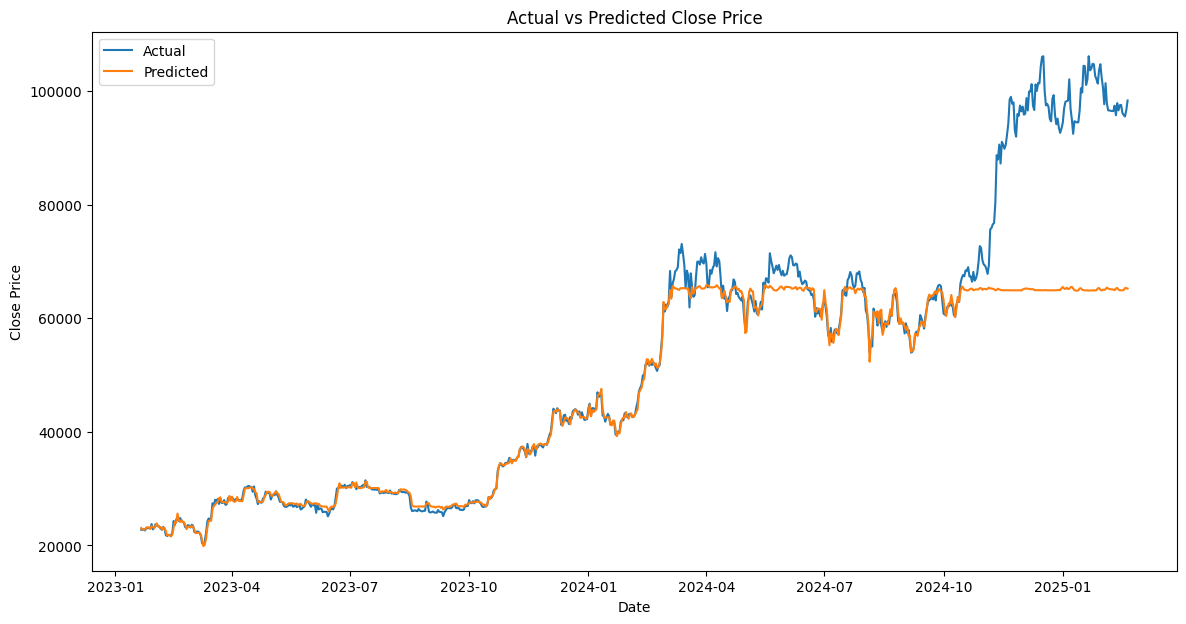

In [ ]:


print("Historical Data Shape: ", df.shape)

X = df.drop(columns={'Close', 'Adj Close'})
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Accuracy: {accuracy}%')


plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()


import pickle 
with open('rf_naive_model.pkl','wb') as f:
    pickle.dump(model, f)


with open('rf_naive_scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

feature_names = X_train.columns.tolist()
with open('rf_naive_features.pkl','wb') as f:
    pickle.dump(feature_names, f)

burada, verinin son kısmında fiyatlar 100k'yı geçmekte, fakat splitin yapıldığı noktanın etrafında o değerler hiç bulunmamaktaydı
dolayısıyla  model daha önce 65k üstü bir değer görmediği için verinin kalanında ona göre davranıyordu. 
diğer featurelar ufak ufak hareket etmesine yol açsa da bu pek işe yaramıyordu
o yüzden verinin büyük zıplamalarında modelin davranışını toparlamam gerekti, buradaki train test splitinin sebep olduğu şeyi çözmek için daha sonra sliding window uyguladım.
Scaler, feature list ve modelin kendisini de her seferinde kaydediyorum. Bununla alakalı bir hata yaşadıktan sonra bunları ekledim. Feature uzayı yüklenen ve test edilen modellerde farklıydı. 

In [500]:
df = df_copy.copy()
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

print("Historical Data Shape: ", df.shape)

X = df.drop(columns={'Close', 'Adj Close'})
y = df['Close']
#https://datascience.stackexchange.com/questions/29173/time-series-forecasting-sliding-window-method
#fikri kendim buldum aslında, tam da kafamdakine göre bir şey bulamadım fakat bu kafamdaki şeylerin cümleye dökülmüş haliydi, mantıklı bir şey olduğuna ikna oldum en azından
window_size = int(len(X) * 0.2)
threshold   = 0.25  
param_grid = {
    'threshold':    [0.20, 0.25, 0.30],   
    'n_estimators': [50, 100]            
}

results = []


Historical Data Shape:  (3810, 45)


In [ ]:
for threshold, n_estimators in itertools.product(param_grid['threshold'],
                                                param_grid['n_estimators']):
   
    window_size      = int(len(X) * 0.2)
    price_at_retrain = y.iloc[window_size - 1]
    
    scaler = StandardScaler()
    model  = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    
    X_train      = X.iloc[:window_size]
    y_train      = y.iloc[:window_size]
    X_train_s    = scaler.fit_transform(X_train)
    model.fit(X_train_s, y_train)
    
    preds, dates = [], []
    
    
    for i in range(window_size, len(X)):
        today_price = y.iloc[i - 1]
        pct_move    = abs(today_price - price_at_retrain) / price_at_retrain
        
        if pct_move > threshold:
           
            start       = max(0, i - window_size)
            X_train     = X.iloc[start:i]
            y_train     = y.iloc[start:i]
            
            scaler      = StandardScaler()
            model       = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
            X_tr_s      = scaler.fit_transform(X_train)
            model.fit(X_tr_s, y_train)
            
            price_at_retrain = y_train.iloc[-1]
        
       
        X_next_s = scaler.transform(X.iloc[i:i+1])
        preds.append(model.predict(X_next_s)[0])
        dates.append(X.index[i])
    
    
    y_true = y.loc[dates]
    y_pred = pd.Series(preds, index=dates)
    
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2  = r2_score(y_true, y_pred)
    
    results.append({
        'threshold':    threshold,
        'n_estimators': n_estimators,
        'MSE':          mse,
        'MAE':          mae,
        'R2':           r2
    })


results_df = pd.DataFrame(results).sort_values('R2', ascending=False)
print("Hyperparameter tuning results:")
print(results_df)


best = results_df.iloc[0]
print(f"\nBest: threshold={best.threshold}, n_estimators={best.n_estimators}")

Hyperparameter tuning results:
   threshold  n_estimators           MSE          MAE        R2
1       0.20           100  4.501924e+06   981.026322  0.992230
0       0.20            50  4.800250e+06  1017.298355  0.991715
3       0.25           100  1.235191e+07  1520.098602  0.978681
2       0.25            50  1.287894e+07  1550.583365  0.977771
5       0.30           100  1.949278e+07  1930.801247  0.966355
4       0.30            50  2.048430e+07  1974.012654  0.964644

Best: threshold=0.2, n_estimators=100.0


Results with threshold=0.2, n_estimators=100
  MSE: 4501923.64
  MAE: 981.03
MAPE: 3.62%
  R²: 0.9922


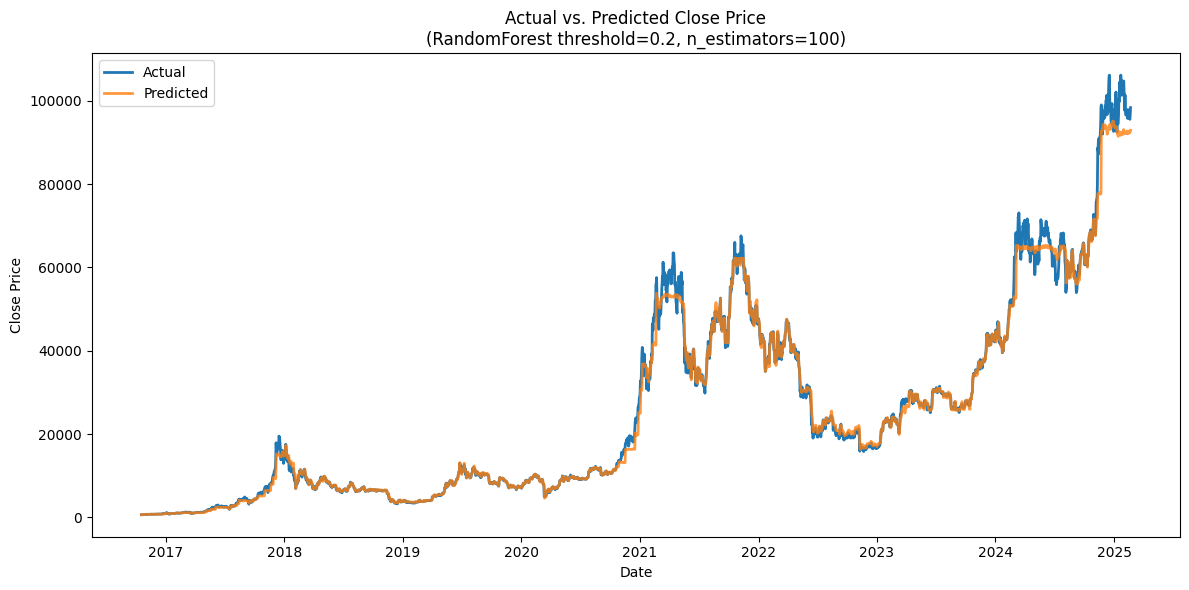

In [501]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

df = df_copy.copy()

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek



X = df.drop(columns=['Close','Adj Close'])
y = df['Close']


window_size  = int(len(X) * 0.2)  
threshold    = 0.20               
n_estimators = 100                


price_at_retrain = y.iloc[window_size - 1]
scaler           = StandardScaler()
model            = RandomForestRegressor(n_estimators=n_estimators, random_state=42)

X_train = X.iloc[:window_size]
y_train = y.iloc[:window_size]
X_train_s = scaler.fit_transform(X_train)
model.fit(X_train_s, y_train)


preds, dates = [], []

for i in range(window_size, len(X)):
    today_price = y.iloc[i - 1]
    pct_move    = abs(today_price - price_at_retrain) / price_at_retrain

    
    if pct_move > threshold:
        start   = max(0, i - window_size)
        X_train = X.iloc[start:i]
        y_train = y.iloc[start:i]
        scaler  = StandardScaler()
        model   = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
        X_tr_s  = scaler.fit_transform(X_train)
        model.fit(X_tr_s, y_train)
        price_at_retrain = y_train.iloc[-1]

   
    X_next_s = scaler.transform(X.iloc[i:i+1])
    preds.append(model.predict(X_next_s)[0])
    dates.append(X.index[i])


y_true = y.loc[dates]
y_pred = pd.Series(preds, index=dates, name='Predicted')


mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2  = r2_score(y_true, y_pred)
print(f"Results with threshold={threshold}, n_estimators={n_estimators}")
print(f"  MSE: {mse:.2f}")
print(f"  MAE: {mae:.2f}")
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"MAPE: {mape:.2f}%")
print(f"  R²: {r2:.4f}")





plt.figure(figsize=(12, 6))
plt.plot(y_true.index, y_true, label='Actual',   linewidth=2)
plt.plot(y_pred.index, y_pred, label='Predicted', linewidth=2, alpha=0.8)
plt.title(f"Actual vs. Predicted Close Price\n(RandomForest threshold={threshold}, n_estimators={n_estimators})")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

import pickle 
with open('rf_threshold_model.pkl', 'wb') as f:
    pickle.dump(model, f)


with open('rf_threshold_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


feature_names = X.columns.tolist()
with open('rf_threshold_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)


config = {
    'window_size':  window_size,
    'threshold':    threshold,
    'n_estimators': n_estimators
}
with open('rf_threshold_config.pkl', 'wb') as f:
    pickle.dump(config, f)


Burada modelin 65000 civarındaki eşiğe takılmasını önlediğimi fark ettim. Sliding window işe yaradı yani. 
Yine de gözle görülebilir eşikler olsa da, en azından modeli orada "mahsur" kalmaktan kurtardım.
Threshold'u ne kadar küçültürsek model o kadar daha az "eşik"lerde takılır, başarısı artar, o yüzden HP tuningden aslında 0.2 çıkacağı bariz fakat yine de göstermek istedim.
Fakat threshold küçüldükçe modelin çalışma süresi çok artıyor.
Bu arada HP tuning yaptığım kısımda model kaydetme yok, HP tuningden en iyi çıkan modeli burada kaydettim.

c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Tuning Results:
hidden_layers  alpha          MSE         MAE       R2
    (100, 50) 0.0010 1.260169e+07 2626.932859 0.978604
    (100, 50) 0.0001 1.637132e+07 2982.390509 0.972204
        (50,) 0.0010 5.249018e+07 5615.978111 0.910880
        (50,) 0.0001 5.249018e+07 5615.978115 0.910880

Best config → hidden_layers=(100, 50), alpha=0.001


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


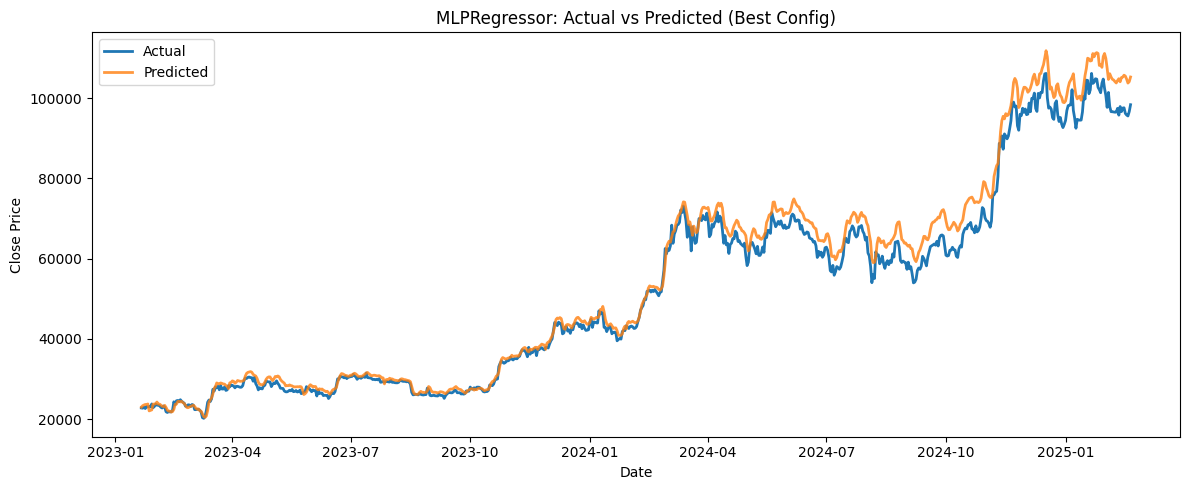

In [509]:
from sklearn.neural_network import MLPRegressor
df = df_copy.copy()
df = df.dropna()

X = df.drop(columns=['Close','Adj Close'])
y = df['Close']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)


scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)


hidden_sizes_list = [(50,), (100,50)]
alphas           = [1e-4, 1e-3]

results = []

for hs in hidden_sizes_list:
    for alpha in alphas:
        mlp = MLPRegressor(
            hidden_layer_sizes=hs,
            alpha=alpha,
            activation='relu',
            solver='adam',
            max_iter=500,
            random_state=42
        )
        mlp.fit(X_train_s, y_train)
        
       
        y_pred = mlp.predict(X_test_s)
        mse  = mean_squared_error(y_test, y_pred)
        mae  = mean_absolute_error(y_test, y_pred)
        r2   = r2_score(y_test, y_pred)
        
        results.append({
            'hidden_layers': hs,
            'alpha': alpha,
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        })


results_df = pd.DataFrame(results).sort_values('R2', ascending=False)
print("MLP Tuning Results:")
print(results_df.to_string(index=False))


best = results_df.iloc[0]
print(f"\nBest config → hidden_layers={best.hidden_layers}, alpha={best.alpha}")

best_mlp = MLPRegressor(
    hidden_layer_sizes=best.hidden_layers,
    alpha=best.alpha,
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
best_mlp.fit(X_train_s, y_train)
y_best = best_mlp.predict(X_test_s)

plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test, label='Actual',   linewidth=2)
plt.plot(y_test.index, y_best,  label='Predicted', linewidth=2, alpha=0.8)
plt.title("MLPRegressor: Actual vs Predicted (Best Config)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.tight_layout()
plt.show()

from joblib import dump

feature_names = X_train.columns.tolist()
with open('mlp_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)


config = {
    'hidden_layer_sizes': best.hidden_layers,
    'alpha': best.alpha,
    'max_iter': 500,
    'activation': 'relu',
    'solver': 'adam',
    'random_state': 42
}
with open('mlp_config.pkl', 'wb') as f:
    pickle.dump(config, f)


Burada farklı hidden layer ve alpha değerlerine göre tune edip en iyi kombinasyonu buluyorum. Kaydederken pipeline olduğu için joblib kullanıyorum.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5888\2781463931.py:17: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  cv_results = cross_validate(lr, X_train, y_train.ravel(), cv=cv, scoring=scoring)


,Fold,RMSE,R2
0,1,332.916939,0.999564
1,2,392.756812,0.999437
2,3,342.251110,0.999542
3,4,322.402170,0.999618
4,5,343.789796,0.999519


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5888\2781463931.py:39: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_pred = cross_val_predict(lr, X_train, y_train.ravel(), cv=cv)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_5888\2781463931.py:43: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  'Actual':    y_train.ravel(),


|   Fold |    RMSE |       R2 |
|-------:|--------:|---------:|
|      1 | 332.917 | 0.999564 |
|      2 | 392.757 | 0.999437 |
|      3 | 342.251 | 0.999542 |
|      4 | 322.402 | 0.999618 |
|      5 | 343.79  | 0.999519 |
Mean RMSE: 346.82
Std  RMSE: 27.06
Mean R2:   0.9995
Std  R2:    0.0001


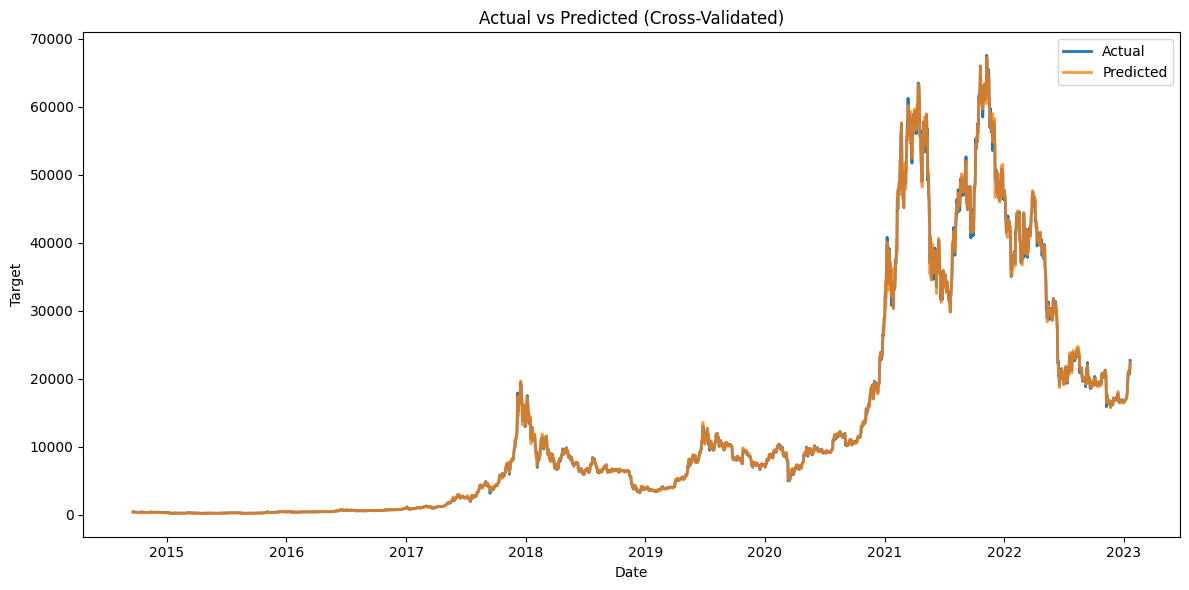

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5888\2781463931.py:59: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  lr.fit(X_train, y_train.ravel())


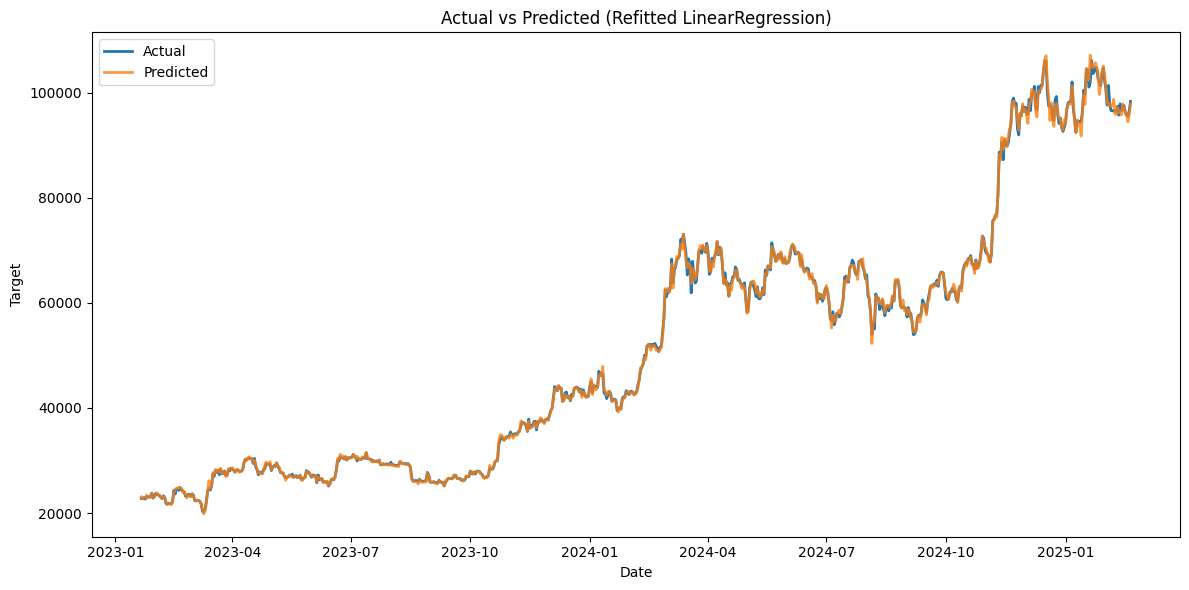

In [507]:
import pandas as pd
from sklearn.model_selection import KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

df = df_copy.copy()

X = df.drop(columns=['Close','Adj Close'])
y = df['Close']


cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {'rmse':'neg_root_mean_squared_error','r2':'r2'}


lr = LinearRegression()
cv_results = cross_validate(lr, X_train, y_train.ravel(), cv=cv, scoring=scoring)


df_cv = pd.DataFrame({
    'Fold': range(1, len(cv_results['test_rmse'])+1),
    'RMSE': -cv_results['test_rmse'],   
    'R2':   cv_results['test_r2']
})


from IPython.display import display
display(df_cv)


print(df_cv.to_markdown(index=False))

print(f"Mean RMSE: {df_cv['RMSE'].mean():.2f}")
print(f"Std  RMSE: {df_cv['RMSE'].std():.2f}")
print(f"Mean R2:   {df_cv['R2'].mean():.4f}")
print(f"Std  R2:    {df_cv['R2'].std():.4f}")


y_pred = cross_val_predict(lr, X_train, y_train.ravel(), cv=cv)


comp_df = pd.DataFrame({
    'Actual':    y_train.ravel(),
    'Predicted': y_pred
}, index=X_train.index)


plt.figure(figsize=(12,6))
plt.plot(comp_df.index, comp_df['Actual'],    label='Actual',   linewidth=2)
plt.plot(comp_df.index, comp_df['Predicted'], label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Actual vs Predicted (Cross-Validated)')
plt.legend()
plt.tight_layout()
plt.show()


lr.fit(X_train, y_train.ravel())


y_test_pred = lr.predict(X_test)


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test,       label='Actual',    linewidth=2)
plt.plot(y_test.index, y_test_pred,  label='Predicted', linewidth=2, alpha=0.8)
plt.xlabel('Date')
plt.ylabel('Target')
plt.title('Actual vs Predicted (Refitted LinearRegression)')
plt.legend()
plt.tight_layout()
plt.show()


with open('linear_regression_refit.pkl', 'wb') as f:
    pickle.dump(lr, f)


feature_names = X_train.columns.tolist()
with open('linear_regression_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

Önce cross validation sonucuna göre en iyi sonuç veren kısmın grafiğini çizdim. Daha sonra bu kısımda elde edilen train kümesine göre modeli fit ettim. En iyi sonuç veren model bu oldu. 

Baseline XGBRegressor performance:
 MSE: 169131044.45
 MAE: 6108.87
 R² : 0.7128


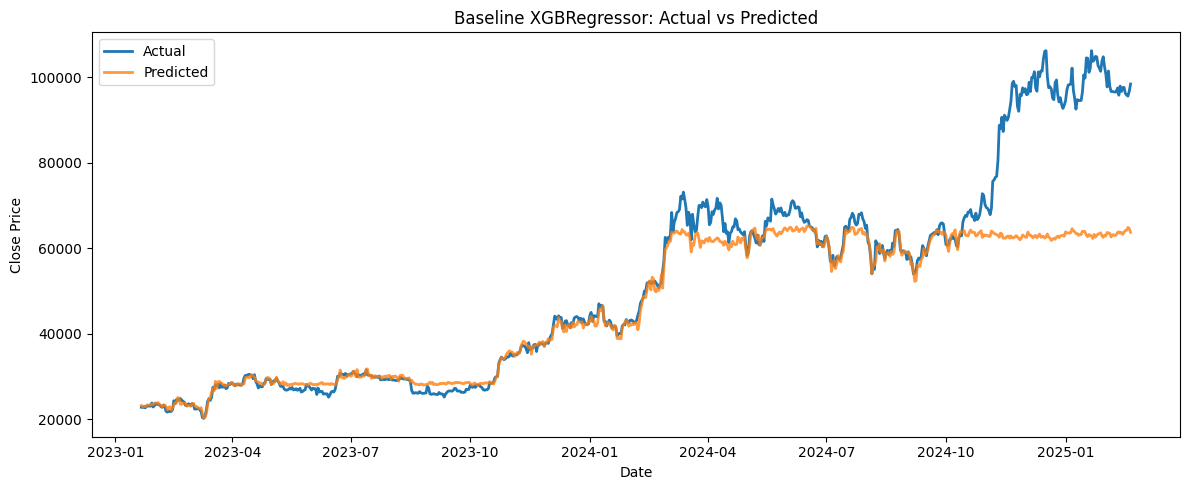


Tuning results (top 5):
 n_estimators  max_depth  learning_rate          MSE          MAE        R2
          100          3           0.10 1.543592e+08  5555.423730  0.737923
           50          3           0.10 1.598702e+08  5740.438795  0.728566
          100          6           0.10 1.603675e+08  5789.494901  0.727721
           50          6           0.10 1.650595e+08  5911.192185  0.719755
          100          6           0.01 6.000999e+08 18223.256040 -0.018875

Best params → n_estimators=100.0, max_depth=3.0, learning_rate=0.1


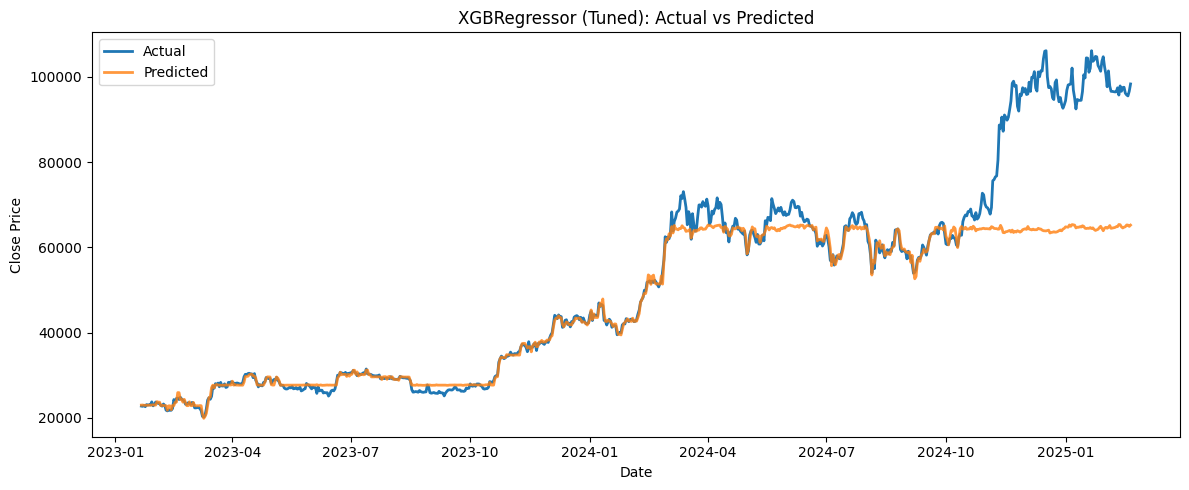

In [506]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = df_copy.copy()


df['Year']      = df.index.year
df['Month']     = df.index.month
df['Day']       = df.index.day
df['DayOfWeek'] = df.index.dayofweek


for lag in (1,2,3):
    df[f'Close_lag{lag}'] = df['Close'].shift(lag)
df.dropna(inplace=True)


X = df.drop(columns=['Close','Adj Close'])
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


base_model = XGBRegressor(random_state=42)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)

print("Baseline XGBRegressor performance:")
print(" MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print(" MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred)))
print(" R² : {:.4f}".format(r2_score(y_test, y_pred)))

plt.figure(figsize=(12,5))
plt.plot(y_test.index,   y_test,   label='Actual',   linewidth=2)
plt.plot(y_test.index,   y_pred,   label='Predicted', linewidth=2, alpha=0.8)
plt.title("Baseline XGBRegressor: Actual vs Predicted")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend(); plt.tight_layout(); plt.show()


param_grid = {
    'n_estimators': [50, 100],
    'max_depth':    [3, 6],
    'learning_rate':[0.01, 0.1]
}

results = []
for n_est in param_grid['n_estimators']:
    for md in param_grid['max_depth']:
        for lr in param_grid['learning_rate']:
            model = XGBRegressor(
                n_estimators=n_est,
                max_depth=md,
                learning_rate=lr,
                random_state=42
            )
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            results.append({
                'n_estimators':   n_est,
                'max_depth':      md,
                'learning_rate':  lr,
                'MSE':            mean_squared_error(y_test, y_pred),
                'MAE':            mean_absolute_error(y_test, y_pred),
                'R2':             r2_score(y_test, y_pred)
            })

results_df = pd.DataFrame(results).sort_values('R2', ascending=False)
print("\nTuning results (top 5):")
print(results_df.head(5).to_string(index=False))


best = results_df.iloc[0]
print(f"\nBest params → n_estimators={best.n_estimators}, max_depth={best.max_depth}, learning_rate={best.learning_rate}")

best_model = XGBRegressor(
    n_estimators=int(best.n_estimators),
    max_depth=int(best.max_depth),
    learning_rate=float(best.learning_rate),
    random_state=42
)
best_model.fit(X_train, y_train)
y_best = best_model.predict(X_test)

plt.figure(figsize=(12,5))
plt.plot(y_test.index,   y_test,   label='Actual',   linewidth=2)
plt.plot(y_test.index,   y_best,   label='Predicted', linewidth=2, alpha=0.8)
plt.title("XGBRegressor (Tuned): Actual vs Predicted")
plt.xlabel("Date"); plt.ylabel("Close Price")
plt.legend(); plt.tight_layout(); plt.show()
with open('xgb_best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)


feature_names = X_train.columns.tolist()
with open('xgb_features.pkl', 'wb') as f:
    pickle.dump(feature_names, f)

config = {
    'n_estimators':  int(best.n_estimators),
    'max_depth':     int(best.max_depth),
    'learning_rate': float(best.learning_rate),
    'random_state':  42
}
with open('xgb_config.pkl', 'wb') as f:
    pickle.dump(config, f)